# Distributing standardized COMBINE archives with Tellurium

<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/tellurium-and-libroadrunner.png" width="60%" style="padding: 20px"></div>
<div align='center' style='font-size:100%'>
Veronica L. Porubsky, BS
<div align='center' style='font-size:100%'>Sauro Lab PhD Student, Department of Bioengineering<br>
Head of Outreach, <a href="https://reproduciblebiomodels.org/dissemination-and-training/seminar/">Center for Reproducible Biomedical Modeling</a><br>
University of Washington, Seattle, WA USA
</div>
<hr>

To facilitate design and comprehension of their models, modelers should use standard systems biology formats for
model descriptions, simulation experiments,


## TOC
* [Packages and Constants](#standardized-formats-packages-and-constants)
* [The benefits of using standardized tools and formats](#standards-benefits)
* [Import and export capabilities with Tellurium](#import-export)
* [Importing SBML directly from the BioModels Database for simulation](#import-from-biomodels)
* [Exporting SBML or Antimony models](#export-to-sbml-or-antimony)
* [Writing SED-ML with PhraSED-ML](#writing-phrasedml)
* [Exporting SED-ML](#exporting-sedml)
* [Generating a COMBINE archive](#combine-archive)
* [Exercises](#exercises)

# Packages and constants <a class="anchor" id="standardized-formats-packages-and-constants"></a>


In [16]:
!pip install --upgrade tellurium -q
import tellurium as te
import phrasedml
import os

You should consider upgrading via the '/Users/veronica_porubsky/venv/bin/python -m pip install --upgrade pip' command.


# The benefits of using standardized tools and formats <a class="anchor" id="standards-benefits"></a>
<br>


# Import and export capabilities with Tellurium <a class="anchor" id="import-export"></a>
<br>
Models can be imported from the BioModels Database, given the appropriate BioModel ID. However, due to a firewall on nanoHUB, we are unable to perform this import. Instead, upload BIOMD0000000090.xml to your Tellurium tool on nanoHUB.

This is a model of respiratory oscillations in Saccharomyces cerevisae by <a href="https://www.ebi.ac.uk/biomodels/BIOMD0000000090">Jana Wolf et al. (2001):</a> </div>
<br>

<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/wolf_publication.PNG" width="65%" style="padding: 20px"></div>
<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/wolf_network.PNG" width="65%" style="padding: 20px"></div>

# Importing SBML directly from the BioModels Database for simulation <a class="anchor" id="import-from-biomodels"></a>


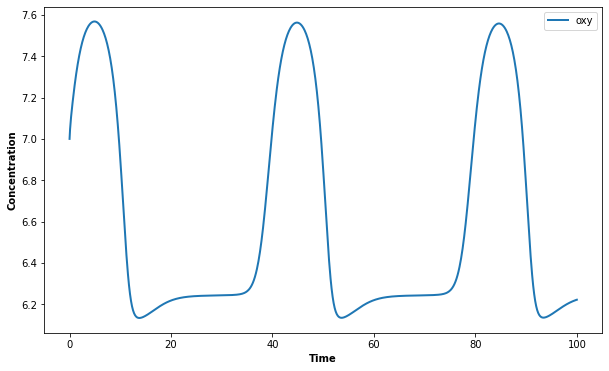

In [17]:
wolf = te.loadSBMLModel("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000090.2?filename=BIOMD0000000090_url.xml")
wolf.simulate(0, 100, 1000, ['time', 'oxy']) # note that specific species can be selected for recording concentrations over the timecourse
wolf.plot(figsize = (10, 6), xtitle = 'Time', ytitle = 'Concentration')



# Exporting SBML or Antimony models <a class="anchor" id="export-to-sbml-or-antimony"></a>

In [18]:
# Export the model you just accessed from BioModels to the current directory as an SBML string
wolf.reset()
print(wolf.getFloatingSpeciesConcentrationIds())
wolf.exportToSBML('wolf_sbml.xml', current = True)
# wolf.exportToSBML('wolf.xml', current = True)

['[oxy]', '[A3c]', '[aps]', '[pap]', '[sul]', '[eth]', '[hyd]', '[cys]', '[N2]', '[aco]', '[oah]', '[S1]', '[A3m]']


In [19]:
# Export the model you just accessed from BioModels to the current directory as an Antimony string
wolf.reset()
print(wolf.getFloatingSpeciesConcentrationIds())
wolf.exportToAntimony('wolf_antimony.txt', current = True)

['[oxy]', '[A3c]', '[aps]', '[pap]', '[sul]', '[eth]', '[hyd]', '[cys]', '[N2]', '[aco]', '[oah]', '[S1]', '[A3m]']


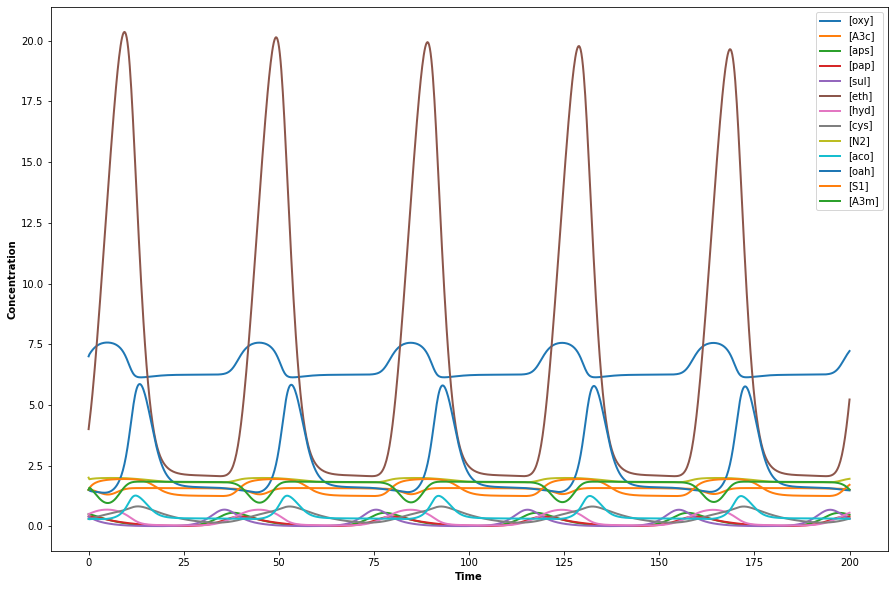

In [20]:
wolf = te.loada('wolf_antimony.txt') # load the Antimony string you just saved to the working directory
wolf.simulate(0, 200, 1000)
wolf.plot(figsize = (15, 10), xtitle = 'Time', ytitle = 'Concentration')


#  Writing SED-ML with PhraSED-ML <a class="anchor" id="writing-phrasedml"></a>

In [21]:
# Set base directory for imports and exports
BASE_DIR = os.getcwd()

# Load model from BioModels Database
wolf = te.loadSBMLModel(
    "https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000090?filename=BIOMD0000000090_url.xml")

# Export SBML model file to current working directory
wolf.exportToSBML('wolf_sbml.xml')

# Write phraSED-ML string specifying the simulation study
wolf_phrasedml = '''
  // Set model
  wolf = model "wolf_sbml.xml"

  // Deterministic simulation
  det_sim = simulate uniform(0, 500, 1000)
  wolf_det_sim = run det_sim on wolf
  plot "Wolf et al. dynamics (Model ID: wolf)"
'''

# Generate SED-ML string from the phraSED-ML string
wolf.resetAll()
wolf_sbml = wolf.getSBML()
phrasedml.setReferencedSBML("wolf_sbml.xml", wolf_sbml)
wolf_sedml = phrasedml.convertString(wolf_phrasedml)



# Exporting SED-ML <a class="anchor" id="exporting-sedml"></a>

In [22]:
# Save the SED-ML simulation experiment to your current working directory
te.saveToFile(os.path.join(BASE_DIR, 'wolf_sedml.xml'), wolf_sedml)

# Load and run SED-ML script
te.executeSEDML(os.path.join(BASE_DIR, 'wolf_sedml.xml'))

TypeError: write() argument must be str, not None

# Generating a COMBINE archive <a class="anchor" id="combine-archive"></a>


In [ ]:
# get Antimony string of Wolf et al.
wolf_antimony = te.readFromFile(os.path.join(BASE_DIR, 'wolf_antimony.txt'))

# create an inline OMEX string
wolf_inline_omex = '\n'.join([wolf_antimony, wolf_phrasedml])

# export to a COMBINE archive
wolf_combine_archive = os.path.join(BASE_DIR, 'wolf.omex')
te.exportInlineOmex(wolf_inline_omex, wolf_combine_archive)


# Exercises <a class="anchor" id="exercises"></a>

## Exercise 1:



In [ ]:
# Exercise 1 Solution

## Exercise 2:

Download the <a href="http://www.ebi.ac.uk/biomodels-main/BIOMD0000000010 "> Kholodenko 2000 model</a> of ultrasensitivity and negative feedback oscillations in the MAPK cascade from the BioModels Database, and upload to your workspace. Simulate and plot simulation results for the model.

<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/kholodenko_publication.PNG" width="75%"></div>


In [ ]:
# Exercise 2 Solution
r = te.loadSBMLModel('BIOMD0000000010_url.xml')
r.simulate(0, 5000, 1000)
r.plot()

# Acknowledgements
<br>
<div align='left'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/acknowledgments.png" width="80%"></div>

<br>
<html>
   <head>
      <title>Bibliography</title>
   </head>
   <body>
      <h1>Bibliography</h1>
      <ol>
         <li>
            <p>K. Choi et al., <cite>Tellurium: An extensible python-based modeling environment for systems and synthetic biology</cite>, Biosystems, vol. 171, pp. 74–79, Sep. 2018.</p>
         </li>
         <li>
            <p>E. T. Somogyi et al., <cite>libRoadRunner: a high performance SBML simulation and analysis library.,</cite>, Bioinformatics, vol. 31, no. 20, pp. 3315–21, Oct. 2015.</p>
          <li>
            <p>L. P. Smith, F. T. Bergmann, D. Chandran, and H. M. Sauro, <cite>Antimony: a modular model definition language</cite>, Bioinformatics, vol. 25, no. 18, pp. 2452–2454, Sep. 2009.</p>
         </li>
         <li>
            <p>K. Choi, L. P. Smith, J. K. Medley, and H. M. Sauro, <cite>phraSED-ML: a paraphrased, human-readable adaptation of SED-ML</cite>, J. Bioinform. Comput. Biol., vol. 14, no. 06, Dec. 2016.</p>
         </li>
         <li>
            <p> B.N. Kholodenko, O.V. Demin, G. Moehren, J.B. Hoek, <cite>Quantification of short term signaling by the epidermal growth factor receptor.</cite>, J Biol Chem., vol. 274, no. 42, Oct. 1999.</p>
         </li>
      </ol>
   </body>
</html>
